Box filters, filter 2D, Gaussian Blur, and Median Blur, & write a program to hardcodeconvolutionusing a kernel
 of known size & value
**

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [16]:
img = cv.imread("shivji.jpeg",0)
img1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

In [17]:
img_box = cv.boxFilter(img,-1,(9,9))
img_guassian = cv.GaussianBlur(img,(9,9),0)
img_median = cv.medianBlur(img,5)

In [18]:
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img_2d = cv.filter2D(img,-1,kernel)

In [19]:
def convolution(img,kernel):
    w,h = img.shape[:2]
    img1 = img.copy()
    for i in range(w-2):
        for j in range(h-2):
            mat1 = np.array([img[i:i+3,j:j+3]])
            mat = np.sum(np.array(mat1*kernel))
            img1[i+1][j+1] =abs(mat)
    return img1

kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [20]:
conv = convolution(img,kernel)

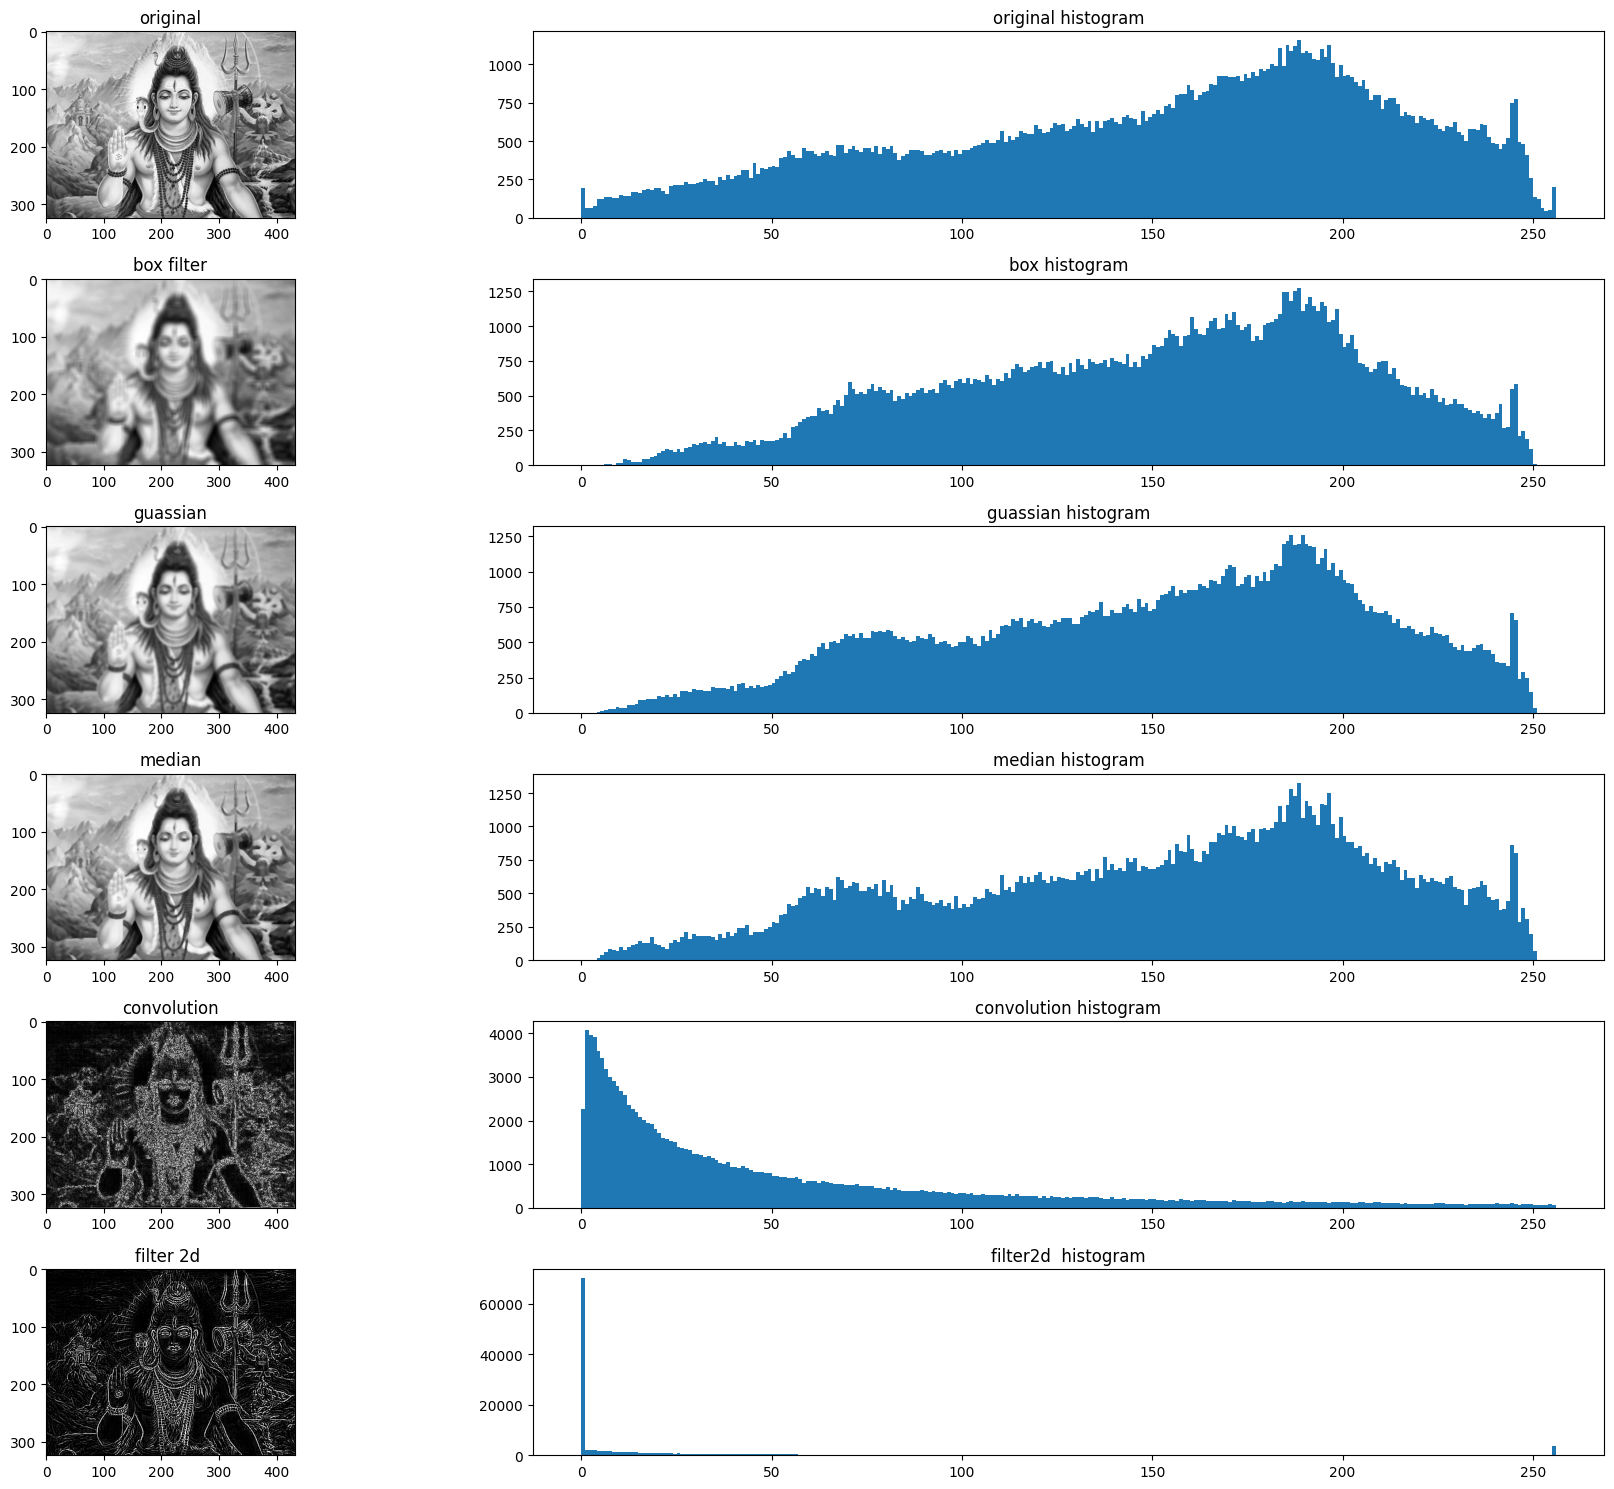

In [21]:
plt.figure(figsize=(20,15))

plt.subplot(6,2,1),plt.imshow(img,cmap='gray'),plt.title("original")
plt.subplot(6,2,2),plt.hist(img.flatten(),bins=256,range=[0,256]),plt.title("original histogram")

plt.subplot(6,2,3),plt.imshow(img_box,cmap='gray'),plt.title("box filter")
plt.subplot(6,2,4),plt.hist(img_box.flatten(),bins=256,range=[0,256]),plt.title("box histogram")

plt.subplot(6,2,5),plt.imshow(img_guassian,cmap='gray'),plt.title("guassian")
plt.subplot(6,2,6),plt.hist(img_guassian.flatten(),bins=256,range=[0,256]),plt.title("guassian histogram")

plt.subplot(6,2,7),plt.imshow(img_median,cmap='gray'),plt.title("median")
plt.subplot(6,2,8),plt.hist(img_median.flatten(),bins=256,range=[0,256]),plt.title("median histogram")

plt.subplot(6,2,9),plt.imshow(conv,cmap='gray'),plt.title("convolution")
plt.subplot(6,2,10),plt.hist(conv.flatten(),bins=256,range=[0,256]),plt.title("convolution histogram")

plt.subplot(6,2,11),plt.imshow(img_2d,cmap='gray'),plt.title("filter 2d ")
plt.subplot(6,2,12),plt.hist(img_2d.flatten(),bins=256,range=[0,256]),plt.title("filter2d  histogram")

plt.tight_layout()
plt.show()